In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
Y_train = train_df['Survived']
Y_test_PassengerId = test_df['PassengerId'] # Save for submission

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_df = train_df[features] 
test_df = test_df[features] 

In [4]:
combined = [train_df, test_df] 

for df in combined:     
    # Filling missing values. 
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Fare'].fillna(df['Fare'].mean(),inplace=True)
    df['Embarked'].fillna(value='S',inplace=True)    
    
    # Converting categorical features to numeric
    df['Sex'] = df['Sex'].replace(['female','male'],[0,1]).astype(int)
    df['Embarked'] = df['Embarked'].replace(['S','Q','C'],[1,2,3]).astype(int)
    
    # Another way to convert categorical features to numeric
    #df['Sex'] = df['Sex'].map({'male': 0, 'female': 1 }).astype(int)    
    #df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)     
      
    # Perform normalization
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
    df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
    df.loc[ df['Fare'] > 250, 'Fare'] = 5
    df['Fare'] = df['Fare'].astype(int)

In [5]:
def sigmoid(z):


    s = 1 / (1 + np.exp(-z))
    
    return s

In [6]:
def initialize_with_zeros(dim):

    
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [7]:
def propagate(w, b, X, Y):

    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                                   # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))          # compute cost
        
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X,(A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw 
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [9]:
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture   
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [10]:
def model(X_train, Y_train, X_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)    
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))

    
    d = {"costs": costs,         
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test": Y_prediction_test,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [11]:
X_train = np.array(train_df).T
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(Y_train.shape[0], 1).T
X_test = np.array(test_df).T

assert X_train.shape[1] == Y_train.shape[1]
assert X_train.shape[0] == X_test.shape[0]
X_train.shape, Y_train.shape, X_test.shape

((7, 891), (1, 891), (7, 418))

In [12]:
d = model(X_train, Y_train, X_test, num_iterations = 100000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.707115
Cost after iteration 200: 0.666981
Cost after iteration 300: 0.634797
Cost after iteration 400: 0.607785
Cost after iteration 500: 0.585073
Cost after iteration 600: 0.566110
Cost after iteration 700: 0.550282
Cost after iteration 800: 0.536959
Cost after iteration 900: 0.525598
Cost after iteration 1000: 0.515845
Cost after iteration 1100: 0.507675
Cost after iteration 1200: 0.501610
Cost after iteration 1300: 0.497760
Cost after iteration 1400: 0.494774
Cost after iteration 1500: 0.492057
Cost after iteration 1600: 0.489553
Cost after iteration 1700: 0.487243
Cost after iteration 1800: 0.485108
Cost after iteration 1900: 0.483133
Cost after iteration 2000: 0.481304
Cost after iteration 2100: 0.479607
Cost after iteration 2200: 0.478033
Cost after iteration 2300: 0.476569
Cost after iteration 2400: 0.475208
Cost after iteration 2500: 0.473941
Cost after iteration 2600: 0.472760
Cost after iteration 2700: 0.471659
Cost

Cost after iteration 22500: 0.445746
Cost after iteration 22600: 0.445712
Cost after iteration 22700: 0.445677
Cost after iteration 22800: 0.445643
Cost after iteration 22900: 0.445610
Cost after iteration 23000: 0.445576
Cost after iteration 23100: 0.445542
Cost after iteration 23200: 0.445509
Cost after iteration 23300: 0.445476
Cost after iteration 23400: 0.445443
Cost after iteration 23500: 0.445410
Cost after iteration 23600: 0.445378
Cost after iteration 23700: 0.445345
Cost after iteration 23800: 0.445313
Cost after iteration 23900: 0.445281
Cost after iteration 24000: 0.445249
Cost after iteration 24100: 0.445217
Cost after iteration 24200: 0.445186
Cost after iteration 24300: 0.445154
Cost after iteration 24400: 0.445123
Cost after iteration 24500: 0.445092
Cost after iteration 24600: 0.445061
Cost after iteration 24700: 0.445030
Cost after iteration 24800: 0.445000
Cost after iteration 24900: 0.444969
Cost after iteration 25000: 0.444939
Cost after iteration 25100: 0.444909
C

Cost after iteration 45000: 0.441168
Cost after iteration 45100: 0.441157
Cost after iteration 45200: 0.441146
Cost after iteration 45300: 0.441135
Cost after iteration 45400: 0.441125
Cost after iteration 45500: 0.441114
Cost after iteration 45600: 0.441104
Cost after iteration 45700: 0.441093
Cost after iteration 45800: 0.441083
Cost after iteration 45900: 0.441072
Cost after iteration 46000: 0.441062
Cost after iteration 46100: 0.441052
Cost after iteration 46200: 0.441041
Cost after iteration 46300: 0.441031
Cost after iteration 46400: 0.441021
Cost after iteration 46500: 0.441011
Cost after iteration 46600: 0.441001
Cost after iteration 46700: 0.440991
Cost after iteration 46800: 0.440981
Cost after iteration 46900: 0.440971
Cost after iteration 47000: 0.440961
Cost after iteration 47100: 0.440952
Cost after iteration 47200: 0.440942
Cost after iteration 47300: 0.440932
Cost after iteration 47400: 0.440923
Cost after iteration 47500: 0.440913
Cost after iteration 47600: 0.440904
C

Cost after iteration 67800: 0.439696
Cost after iteration 67900: 0.439693
Cost after iteration 68000: 0.439689
Cost after iteration 68100: 0.439686
Cost after iteration 68200: 0.439683
Cost after iteration 68300: 0.439679
Cost after iteration 68400: 0.439676
Cost after iteration 68500: 0.439672
Cost after iteration 68600: 0.439669
Cost after iteration 68700: 0.439666
Cost after iteration 68800: 0.439662
Cost after iteration 68900: 0.439659
Cost after iteration 69000: 0.439656
Cost after iteration 69100: 0.439653
Cost after iteration 69200: 0.439649
Cost after iteration 69300: 0.439646
Cost after iteration 69400: 0.439643
Cost after iteration 69500: 0.439640
Cost after iteration 69600: 0.439637
Cost after iteration 69700: 0.439633
Cost after iteration 69800: 0.439630
Cost after iteration 69900: 0.439627
Cost after iteration 70000: 0.439624
Cost after iteration 70100: 0.439621
Cost after iteration 70200: 0.439618
Cost after iteration 70300: 0.439615
Cost after iteration 70400: 0.439612
C

Cost after iteration 90000: 0.439227
Cost after iteration 90100: 0.439226
Cost after iteration 90200: 0.439225
Cost after iteration 90300: 0.439224
Cost after iteration 90400: 0.439223
Cost after iteration 90500: 0.439222
Cost after iteration 90600: 0.439220
Cost after iteration 90700: 0.439219
Cost after iteration 90800: 0.439218
Cost after iteration 90900: 0.439217
Cost after iteration 91000: 0.439216
Cost after iteration 91100: 0.439215
Cost after iteration 91200: 0.439214
Cost after iteration 91300: 0.439213
Cost after iteration 91400: 0.439211
Cost after iteration 91500: 0.439210
Cost after iteration 91600: 0.439209
Cost after iteration 91700: 0.439208
Cost after iteration 91800: 0.439207
Cost after iteration 91900: 0.439206
Cost after iteration 92000: 0.439205
Cost after iteration 92100: 0.439204
Cost after iteration 92200: 0.439203
Cost after iteration 92300: 0.439202
Cost after iteration 92400: 0.439201
Cost after iteration 92500: 0.439200
Cost after iteration 92600: 0.439199
C

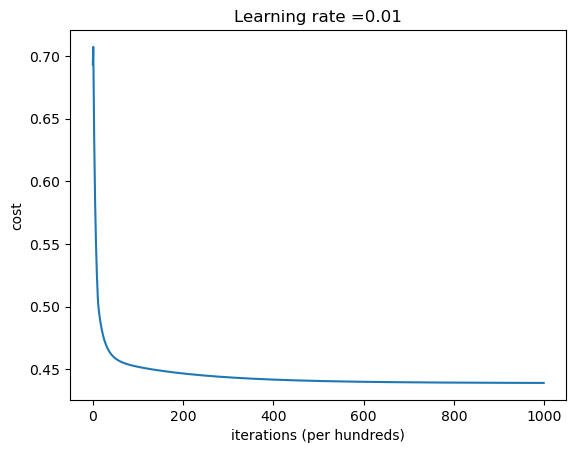

In [13]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [30]:
b = d.get("Y_prediction_train")

In [19]:
df =  pd.read_csv('train.csv')
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']]

In [38]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,n
0,3,male,22.0,1,0,7.2500,S,0,0.0
1,1,female,38.0,1,0,71.2833,C,1,1.0
2,3,female,26.0,0,0,7.9250,S,1,1.0
3,1,female,35.0,1,0,53.1000,S,1,1.0
4,3,male,35.0,0,0,8.0500,S,0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,0.0
887,1,female,19.0,0,0,30.0000,S,1,1.0
888,3,female,NaN,1,2,23.4500,S,0,1.0
889,1,male,26.0,0,0,30.0000,C,1,1.0


In [29]:
len(df)

891

In [35]:
b[0].shape

(891,)

In [36]:
df['n'] = b[0]

In [37]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,n
0,3,male,22.0,1,0,7.2500,S,0,0.0
1,1,female,38.0,1,0,71.2833,C,1,1.0
2,3,female,26.0,0,0,7.9250,S,1,1.0
3,1,female,35.0,1,0,53.1000,S,1,1.0
4,3,male,35.0,0,0,8.0500,S,0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,0.0
887,1,female,19.0,0,0,30.0000,S,1,1.0
888,3,female,NaN,1,2,23.4500,S,0,1.0
889,1,male,26.0,0,0,30.0000,C,1,1.0
